# Exploration of the NOAA Weather Dataset

This notebook shows some statistics of two weather datasets published by the National Oceanic and Atmospheric Administration. The first dataset contains daily summaries of 11 weather station in and around New York City from 2009 to 2015. The second one contains hourly precipitation values of a single weather station in the Central Park from 2009 to 2013.

The purpose of this notebook is to get an impression about what data is available and can be used for prediction of taxi density in NYC.

In [2]:
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML as html

# Enable inline plotting
%matplotlib inline

# Show all columns in a table
pandas.set_option('display.max_columns', None)

## Daily Summaries
### Load Dataset

The following tables show the first rows of the given dataset and some simple statistics of the float-value columns. 

In [3]:
df = pandas.read_csv('../data/noaa_daily_summaries.csv')
df['DATE'] = pandas.to_datetime(df['DATE'], format='%Y%m%d')
df = df.set_index('DATE')
df = df.replace('-9999', np.nan)
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNWD,SNOW,PSUN,TSUN,TMAX,TMIN,TOBS,AWND,WT09,WT14,WT07,WT01,WT15,WT17,WT06,WT21,WT05,WT02,WT11,WT22,WT04,WT13,WT16,WT08,WT18,WT03,WT19
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0,0.0,0.0,NaN,NaN,-3.3,-9.4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0,0.0,0.0,NaN,NaN,1.1,-5.0,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2009-01-03,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0,0.0,0.0,NaN,NaN,3.3,-1.7,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2009-01-04,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0,0.0,0.0,NaN,NaN,5.6,-3.9,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0,0.0,0.0,NaN,NaN,6.1,3.3,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [4]:
float_columns = ['PRCP', 'SNWD', 'SNOW', 'PSUN', 'TSUN', 'TMAX', 'TMIN', 'TOBS', 'AWND']
df[float_columns].describe()

,PRCP,SNWD,SNOW,PSUN,TSUN,TMAX,TMIN,TOBS,AWND
count,18893.000000,9947.000000,15382.000000,0.0,0.0,9223.000000,9223.000000,1554.000000,7643.000000
mean,3.303313,14.847090,2.776297,NaN,NaN,17.251643,9.467505,12.316088,4.062619
std,9.603704,55.685208,20.709230,NaN,NaN,10.124034,9.344875,9.371983,1.967064
min,0.000000,0.000000,0.000000,NaN,NaN,-8.900000,-16.600000,-12.200000,0.100000
25%,0.000000,0.000000,0.000000,NaN,NaN,8.900000,2.200000,5.000000,2.600000
50%,0.000000,0.000000,0.000000,NaN,NaN,17.800000,10.000000,12.800000,3.700000
75%,1.000000,0.000000,0.000000,NaN,NaN,26.100000,17.800000,20.600000,5.100000
max,198.100000,584.000000,432.000000,NaN,NaN,40.000000,30.000000,32.800000,16.200000


The explanation of the single columns can be found below. Note that ```NaN``` in a field indicates missing data or data that has not been received.

More detailed documentation can be found at http://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf.



| Column Name  | Description                                                                                    | Unit                                                                                |
|--------------|------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| DATE         | Date of the record.                                                                            |                                                                                     |
| STATION      | Station identification code.(http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt) |                                                                                     |
| STATION_NAME | Name of the station.                                                                           |                                                                                     |
| ELEVATION    | Elevation above mean sea level.                                                                | thousandths of meters                                                               |
| LATITUDE     | Latitude of the position of the station.                                                       | decimated degrees w/northern hemisphere values > 0, southern hemisphere values < 0) |
| LONGITUDE    | Longitude of the position of the station.                                                      | decimated degrees w/northern hemisphere values > 0, southern hemisphere values < 0) |
| PRCP         | Precipitation.                                                                                 | tenths of mm                                                                        |
| SNWD         | Snow depth                                                                                     | mm                                                                                  |
| SNOW         | Snowfall                                                                                       | mm                                                                                  |
| PSUN         | Daily percent of possible sunshine.                                                            | percent                                                                             |
| TSUN         | Daily total sunshine.                                                                          | minutes                                                                             |
| TMAX         | Maximum temperature.                                                                           | celsius degrees to tenths                                                           |
| TMIN         | Minimum temperature.                                                                           | celsius degrees to tenths                                                           |
| TOBS         | Temperature at the time of observation.                                                        | celsius degrees to tenths                                                           |
| AWND         | Average daily wind speed.                                                                      | tenths of meters per second                                                         |
| WT09         | Weather Type: Blowing or drifting snow                                                         | boolean                                                                             |
| WT14         | Weather Type: Drizzle                                                                          | boolean                                                                             |
| WT07         | Weather Type: Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction           | boolean                                                                             |
| WT01         | Weather Type: Fog, ice fog, or freezing fog (may include heavy fog)                            | boolean                                                                             |
| WT15         | Weather Type: Freezing drizzle                                                                 | boolean                                                                             |
| WT17         | Weather Type: Freezing rain                                                                    | boolean                                                                             |
| WT06         | Weather Type: Glaze or rime                                                                    | boolean                                                                             |
| WT21         | Weather Type: Ground fog                                                                       | boolean                                                                             |
| WT05         | Weather Type: Hail (may include small hail)                                                    | boolean                                                                             |
| WT02         | Weather Type: Heavy fog or heaving freezing fog (not always,distinguished from fog)            | boolean                                                                             |
| WT11         | Weather Type: High or damaging winds                                                           | boolean                                                                             |
| WT22         | Weather Type: Ice fog or freezing fog                                                          | boolean                                                                             |
| WT04         | Weather Type: Ice pellets, sleet, snow pellets, or small hail                                  | boolean                                                                             |
| WT13         | Weather Type: Mist                                                                             | boolean                                                                             |
| WT16         | Weather Type: Rain (may include freezing rain, drizzle, and freezing drizzle)                  | boolean                                                                             |
| WT08         | Weather Type: Smoke or haze                                                                    | boolean                                                                             |
| WT18         | Weather Type: Snow, snow pellets, snow grains, or ice crystals                                 | boolean                                                                             |
| WT03         | Weather Type: Thunder                                                                          | boolean                                                                             |
| WT19         | Weather Type: Unknown source of precipitation                                                  | boolean    

### Station Coverage

The following table shows some basic statistical measures about the number of stations with existing measurement results per day. 

The two graphs below illustrate the same data series. In the second one, the data was averaged per month, while the first one shows the number of available stations for each day.

In [5]:
coverage = df[['STATION']].groupby(df.index).count()
coverage.rename(columns={'STATION': 'STATION COUNT'}, inplace=True)
coverage.describe()

,STATION COUNT
count,2556.000000
mean,7.404930
std,1.306898
min,4.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,9.000000


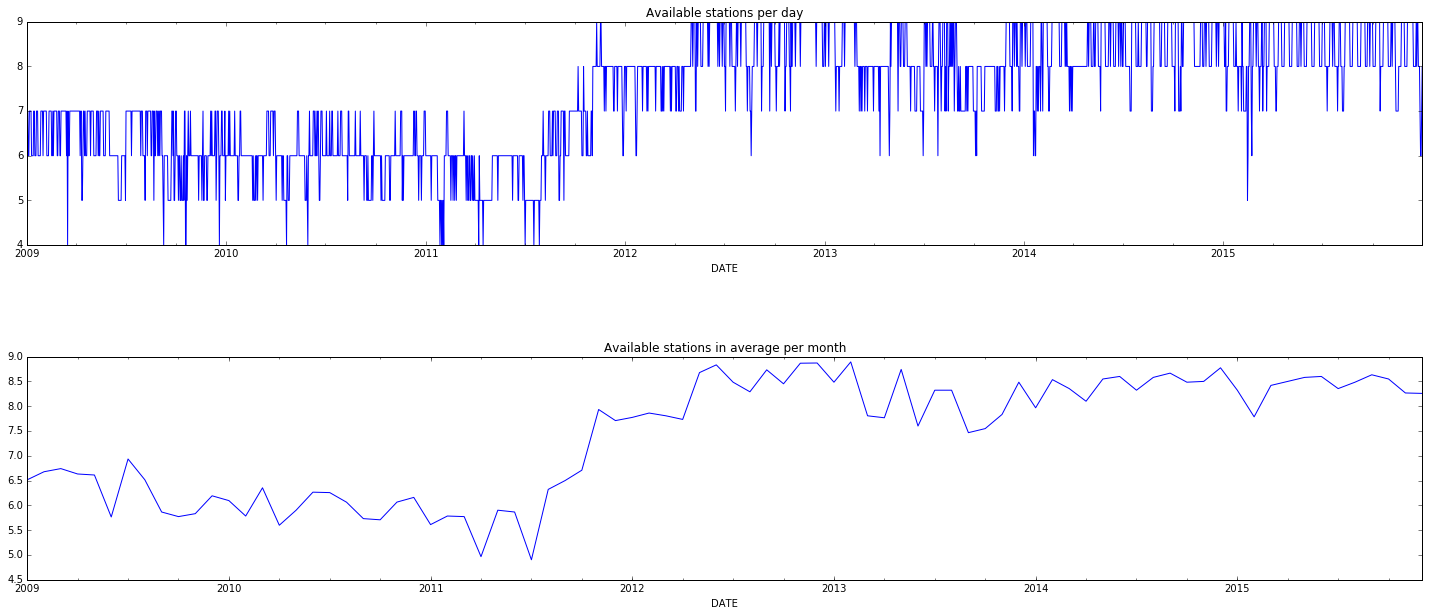

In [6]:
fig, axes = plt.subplots(2,1)

coverage['STATION COUNT'].plot(figsize=(25, 10), ax=axes[0])
axes[0].set_title('Available stations per day')

fig.subplots_adjust(hspace=0.5)

month_coverage = coverage.groupby(pandas.TimeGrouper("M")).mean()
month_coverage['STATION COUNT'].plot(figsize=(25, 10), ax=axes[1])
axes[1].set_title('Available stations in average per month')

---
The following graphs show the percentage of days with measurement results per month for each single weather station in the dataset. 

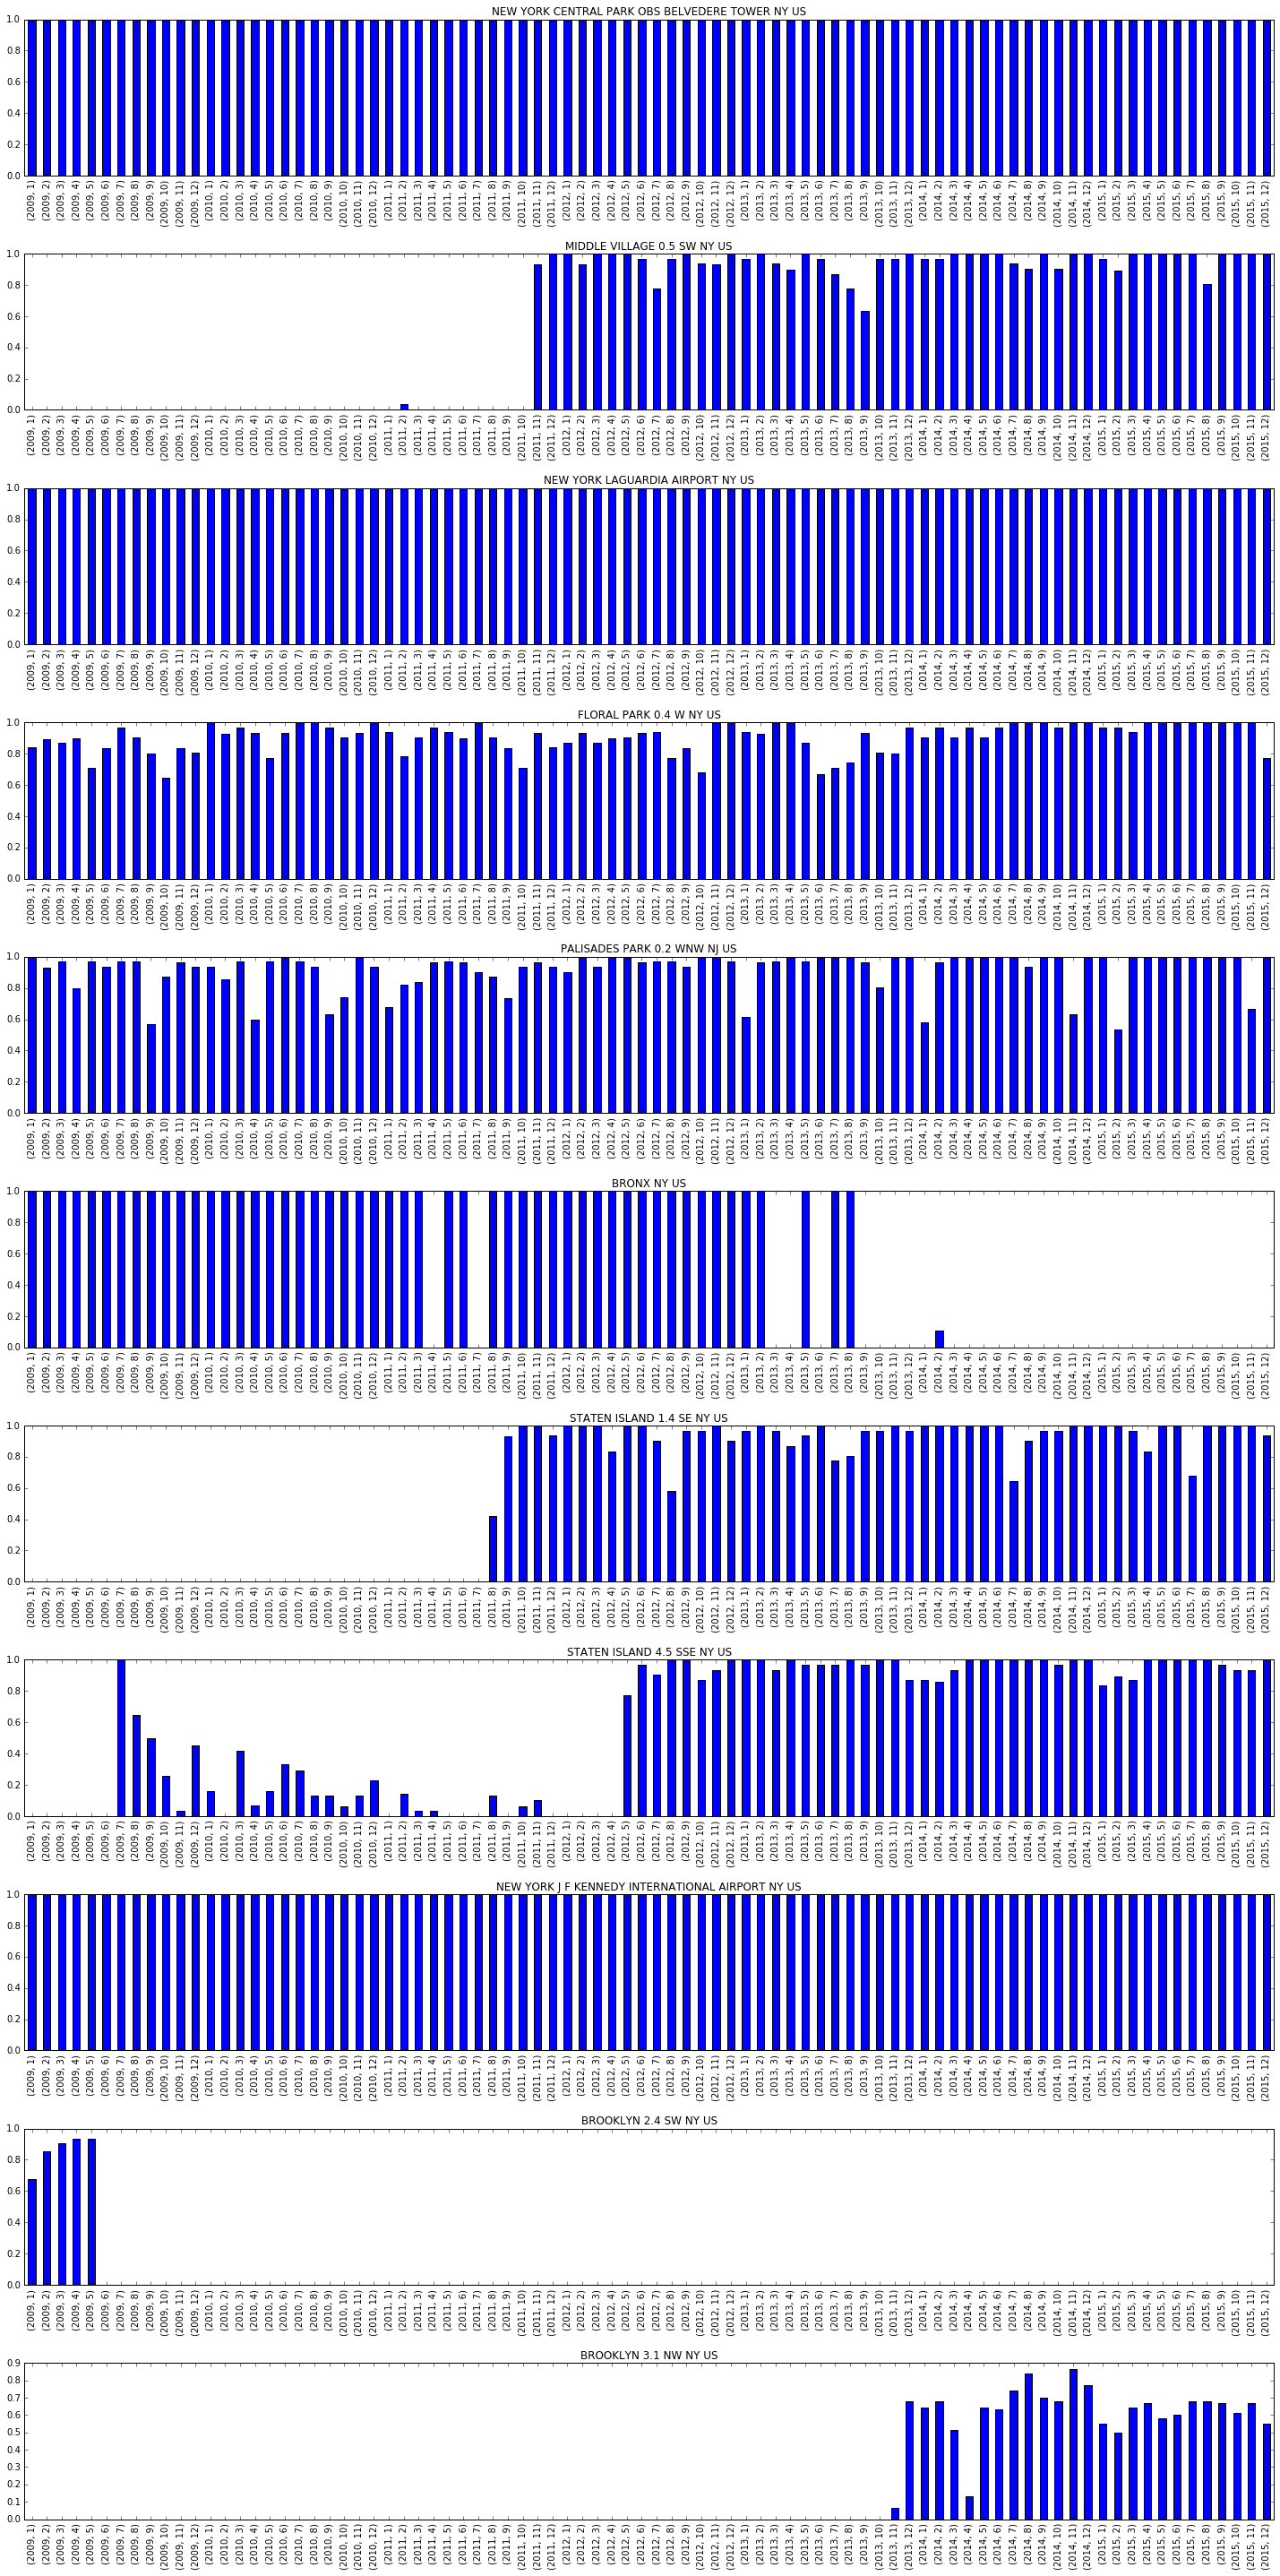

In [7]:
stations = df['STATION'].unique()

fig, axes = plt.subplots(len(stations),1)
fig.subplots_adjust(hspace=0.5)

for i in range(0, len(stations)):    
    station_df = pandas.DataFrame(df[df['STATION'] == stations[i]]['STATION'])
    station_df = station_df.reindex(index=df.index.unique())
    station_df.rename(columns={'STATION': 'AVAILABLE'}, inplace=True)
    station_df['AVAILABLE'] = station_df['AVAILABLE'].apply(lambda x: not pandas.isnull(x))
    
    station_month_coverage = station_df.groupby([station_df.index.year, station_df.index.month]).mean()
    station_month_coverage.rename(columns={'AVAILABLE': 'COVERAGE'}, inplace=True)
    
    station_month_coverage['COVERAGE'].plot.bar(figsize=(25, 50), ax=axes[i])
    axes[i].set_title(df[df['STATION'] == stations[i]].iloc[0]['STATION_NAME'])

In the map below, all weather stations are marked. If the map is not rendered, you can also view it on [Google MyMaps](https://www.google.com/maps/d/embed?mid=169P_b4vtHnKEuH3YPO7q4z8jmlQ).

In [8]:
html('<iframe src="https://www.google.com/maps/d/embed?mid=169P_b4vtHnKEuH3YPO7q4z8jmlQ" ' + 
     'style="width: 100%; height: 500px"></iframe>')

### Standard deviation of measured data per day

The following table shows some statistical measures about the standard deviation of measured data from the different weather stations on the same day.

The plots below show for each (float-value) measurand its variance per day over the entire period.

In [9]:
day_column_std = df.groupby(df.index).std(ddof=0)
day_column_std[float_columns].describe()

,PRCP,SNWD,SNOW,PSUN,TSUN,TMAX,TMIN,TOBS,AWND
count,2556.000000,2556.000000,2556.000000,0.0,0.0,2556.000000,2556.000000,1554.0,2556.000000
mean,2.532617,4.880664,1.749484,NaN,NaN,0.692601,0.652203,0.0,1.114669
std,5.118519,17.161122,10.509937,NaN,NaN,0.472174,0.443485,0.0,0.481852
min,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,NaN,NaN,0.424264,0.300000,0.0,0.746466
50%,0.165359,0.000000,0.000000,NaN,NaN,0.604152,0.518545,0.0,1.049868
75%,2.806623,0.000000,0.000000,NaN,NaN,0.869986,0.850000,0.0,1.395429
max,57.310081,143.884285,149.505853,NaN,NaN,4.654031,7.046630,0.0,3.564953


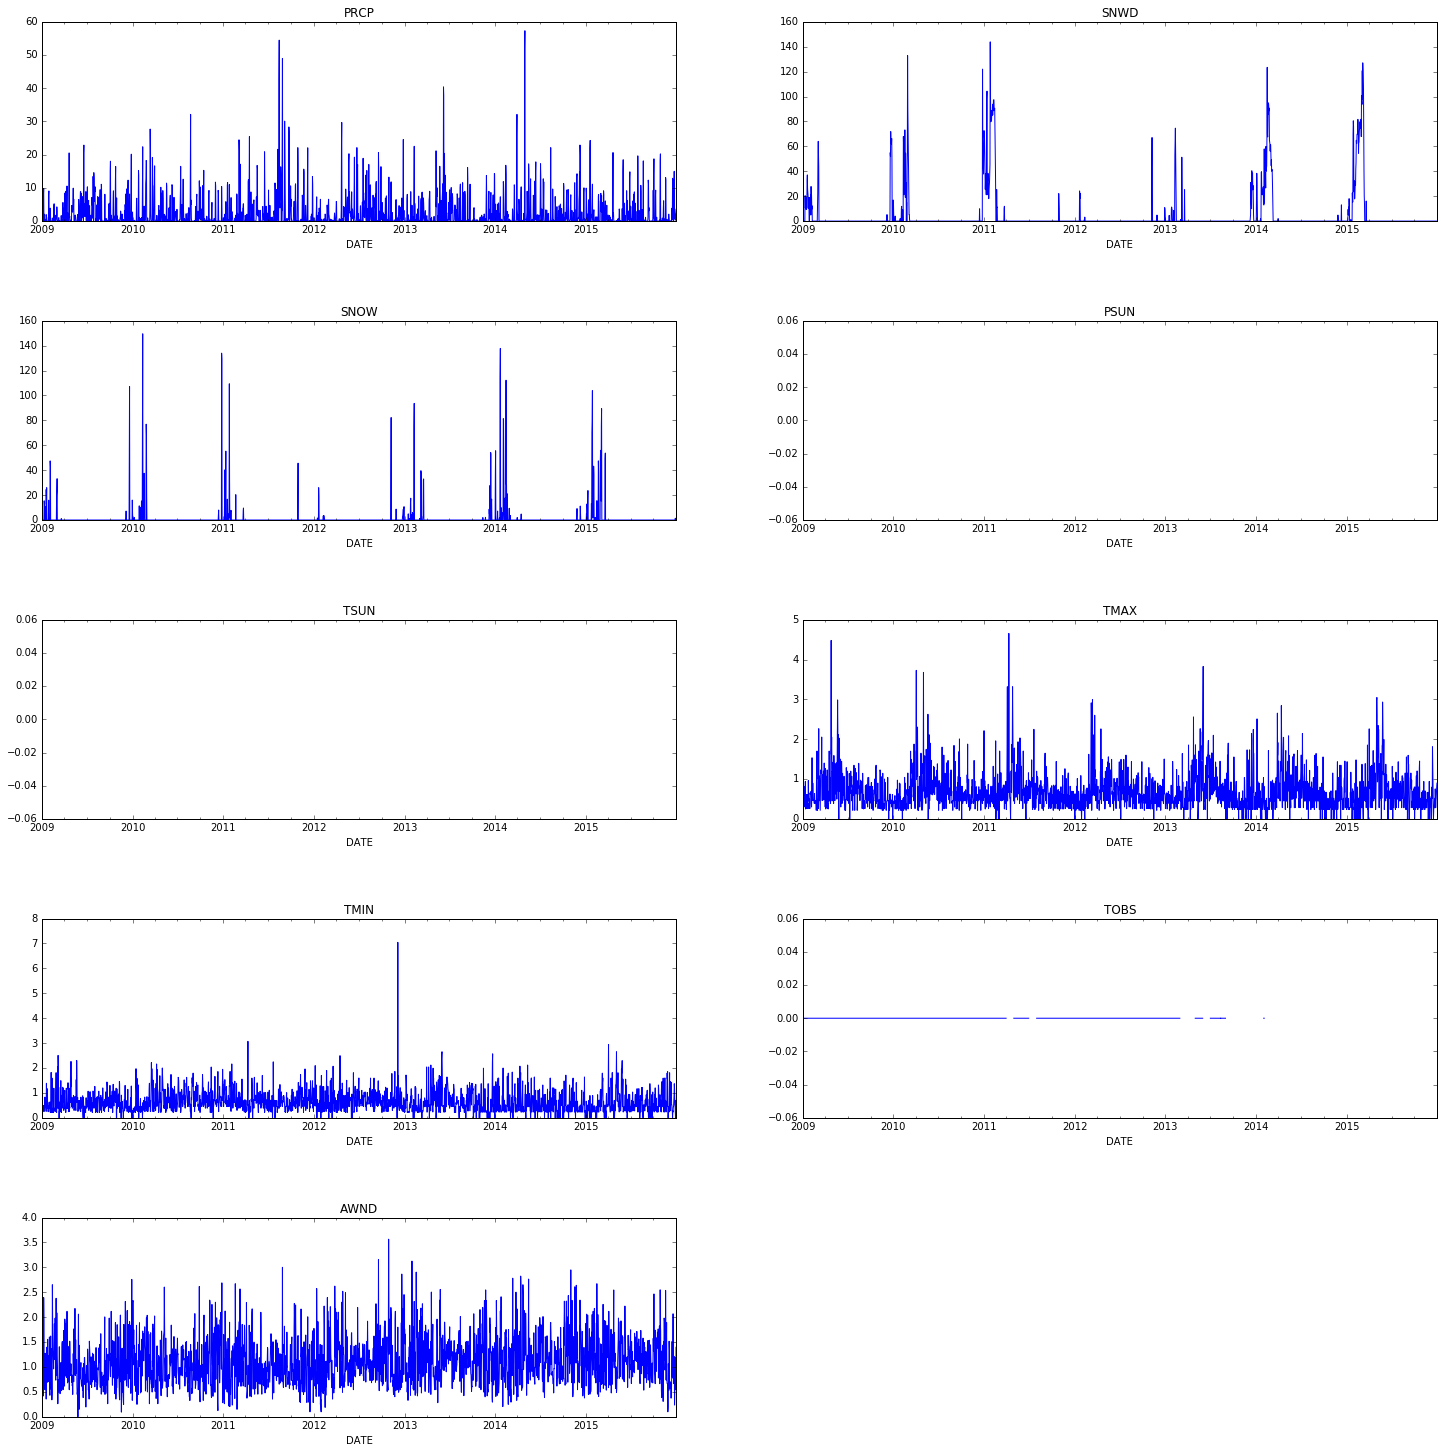

In [45]:
ncols = 2
nrows = int(math.ceil(len(float_columns) / float(ncols)))
fig, axes = plt.subplots(nrows, ncols)
if(len(float_columns) % 2 > 0):
    fig.delaxes(axes[nrows - 1, ncols - 1])
fig.subplots_adjust(hspace=0.5)

for i in range(0, len(float_columns)):
    column = float_columns[i]
    day_column_std[column].plot(figsize=(25, 25), ax=axes[i//ncols, i%ncols])
    axes[i//ncols, i%ncols].set_title(column)

## Hourly Precipitation
### Load data from csv

The following tables show the first rows of the given dataset and some simple statistics of the precipitation value (HPCP). 

In [54]:
df = pandas.read_csv('../data/noaa_hourly_precipitation.csv')
df['DATE'] = pandas.to_datetime(df['DATE'], format='%Y%m%d %H:%M')
df = df.set_index('DATE')
df = df.replace('-9999', np.nan)
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,,,
2009-01-01 01:00:00,COOP:305801,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0
2009-01-02 13:00:00,COOP:305801,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0
2009-01-02 14:00:00,COOP:305801,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0
2009-01-02 15:00:00,COOP:305801,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0
2009-01-03 03:00:00,COOP:305801,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,39.6,40.77889,-73.96917,0.0


In [17]:
df['HPCP'].describe()

count    4640.000000
mean        1.424888
std         2.685591
min         0.000000
25%         0.000000
50%         0.510000
75%         1.520000
max        38.100000
Name: HPCP, dtype: float64

### Time coverage

The following graph shows the percentage of hours with measurement results per month in the dataset.

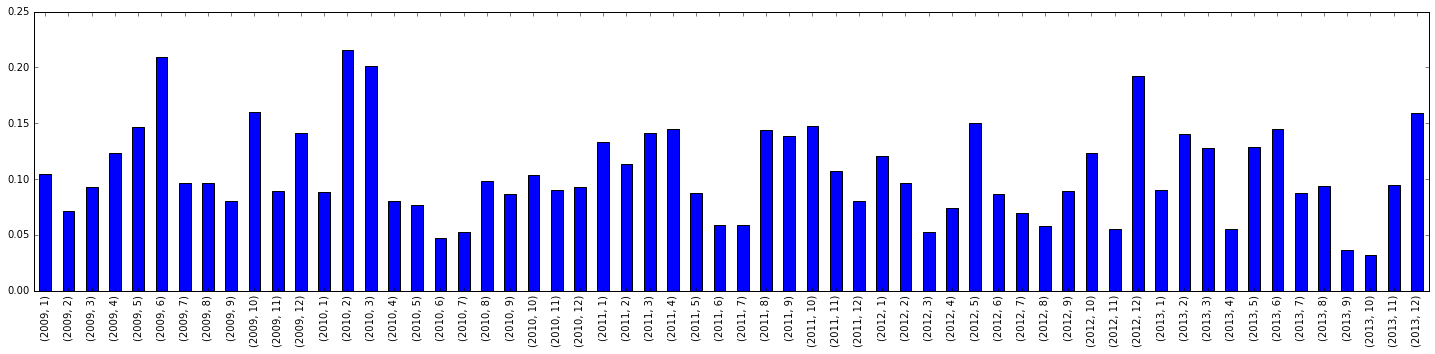

In [51]:
coverage_df = pandas.DataFrame(df['STATION'])
coverage_df.reindex(pandas.date_range('1/1/2009', '31/12/2013', freq='H'))
coverage_df.rename(columns={'STATION': 'COVERAGE'}, inplace=True)
coverage_df['COVERAGE'] = coverage_df['COVERAGE'].apply(lambda x: not pandas.isnull(x))
coverage_df = pandas.DataFrame(coverage_df.groupby([coverage_df.index.year, coverage_df.index.month]).mean())
coverage_df['COVERAGE'].plot.bar(figsize=(25, 5))

### Measurement time distribution

The plot below shows the number of measurements per hour.

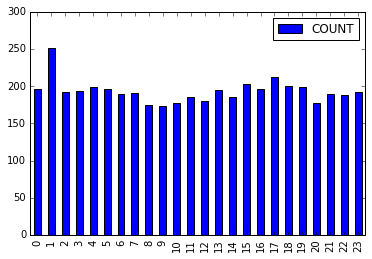

In [71]:
pandas.DataFrame(df.index.values, index=df.index, columns=['COUNT']).groupby(df.index.hour).count().plot.bar()

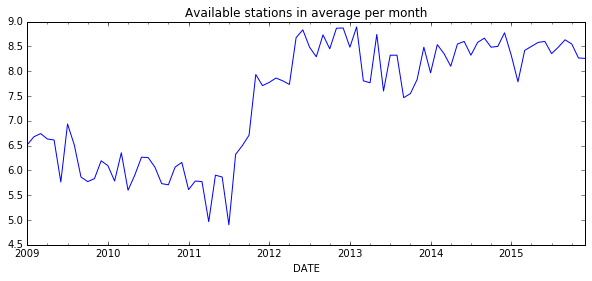

In [9]:
month_coverage = coverage.groupby(pandas.TimeGrouper("M")).mean()
ax = month_coverage['STATION COUNT'].plot(figsize=(10, 4))
ax.set_title('Available stations in average per month')